In [1]:
from isv.evaluation import Benchmark
from isv.datasets import Monks, Bank, Diabetes
from isv.metrics import L2, EuclideanDistance
from isv.explainers import MonteCarloModel, ReformulatedShapleyRegressionModel, ImprovedShapleyRegressionModel, \
                            ReformulatedExactExplainerModel, ImprovedExactExplainerModel
from isv.evaluation.utils import MaskLayer1d, MultiTaskModel

/home/dnapolitano/miniconda3/envs/myenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
benchmark=Benchmark(
    explainers_improved=[MonteCarloModel, ImprovedShapleyRegressionModel], 
    explainers_reformulated=[MonteCarloModel, ReformulatedShapleyRegressionModel], 
    ground_truth_improved=ImprovedExactExplainerModel, 
    ground_truth_reformulated=ReformulatedExactExplainerModel, 
    dataset=[Bank, Diabetes], 
    metrics=[L2, EuclideanDistance], 
    num_samples=3
)

In [3]:
benchmark.run(verbose=True, load=True)

----------------------------------------------------------------------------------------------------
Running dataset: Bank
(1372, 4) (1372,) ['variance', 'skewness', 'curtosis', 'entropy']

Running Black-box Model
Accuracy: 0.9854545454545455

Loading saved surrogate model

Ground Truth Reformulated: R-EXT

Ground Truth Improved: I-EXT

Initializing Explainers Reformulated
	Explainer: <class 'isv.explainers.models_MC.MonteCarloModel'>
	Explainer: <class 'isv.explainers.models_SR.ReformulatedShapleyRegressionModel'>

Explainers Reformulated: dict_keys(['R-EXT', 'R-MC', 'R-ShapleyRegression'])

Initializing Explainers Improved
	Explainer: <class 'isv.explainers.models_MC.MonteCarloModel'>
	Explainer: <class 'isv.explainers.models_SR.ImprovedShapleyRegressionModel'>

Explainers Improved: dict_keys(['I-EXT', 'R-MC', 'I-ShapleyRegression'])

Metrics: dict_keys(['L2', 'EuclideanDistance'])

Running Experiments


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:26<00:00,  8.87s/it]


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Running dataset: Diabetes
(768, 8) (768,) ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

Running Black-box Model
Accuracy: 0.8051948051948052

Loading saved surrogate model

Ground Truth Reformulated: R-EXT

Ground Truth Improved: I-EXT

Initializing Explainers Reformulated
	Explainer: <class 'isv.explainers.models_MC.MonteCarloModel'>
	Explainer: <class 'isv.explainers.models_SR.ReformulatedShapleyRegressionModel'>

Explainers Reformulated: dict_keys(['R-EXT', 'R-MC', 'R-ShapleyRegression'])

Initializing Explainers Improved
	Explainer: <class 'isv.explainers.models_MC.MonteCarloModel'>
	Explainer: <class 'isv.explainers.models_SR.ImprovedShapleyRegressionModel'>

Explainers Improved: dict_keys(['I-EXT', 'R-MC', 'I-ShapleyRegression'])

Metrics: dict_keys(['L2', 'Eucli

100%|██████████| 3/3 [02:39<00:00, 53.26s/it]

----------------------------------------------------------------------------------------------------


In [4]:
benchmark.print_results(Bank)

╒══════════╤══════════╤═══════════╤════════╤═════════════╕
│  Method  │   Time   │   L2_M    │  L2_W  │  Euclidean  │
╞══════════╪══════════╪═══════════╪════════╪═════════════╡
│  R-EXT   │ 0.689093 │ 0         │      0 │   0         │
├──────────┼──────────┼───────────┼────────┼─────────────┤
│   R-MC   │ 1.27102  │ 0.0432262 │      0 │   0.0611678 │
├──────────┼──────────┼───────────┼────────┼─────────────┤
│  R-UKS   │ 1.81219  │ 0.0818131 │      0 │   0.121336  │
├──────────┼──────────┼───────────┼────────┼─────────────┤
│   R-KS   │ 1.81219  │ 0.0857978 │      0 │   0.115701  │
╘══════════╧══════════╧═══════════╧════════╧═════════════╛
╒══════════╤══════════╤═══════════╤════════════╤═════════════╕
│  Method  │   Time   │   L2_M    │    L2_W    │  Euclidean  │
╞══════════╪══════════╪═══════════╪════════════╪═════════════╡
│  I-EXT   │ 0.787268 │ 0         │ 0          │   0         │
├──────────┼──────────┼───────────┼────────────┼─────────────┤
│   I-MC   │  1.2862  │ 0.061076  │ 

In [5]:
from isv.display import BarPlot, TimeFeaturePlot, CoVPlot

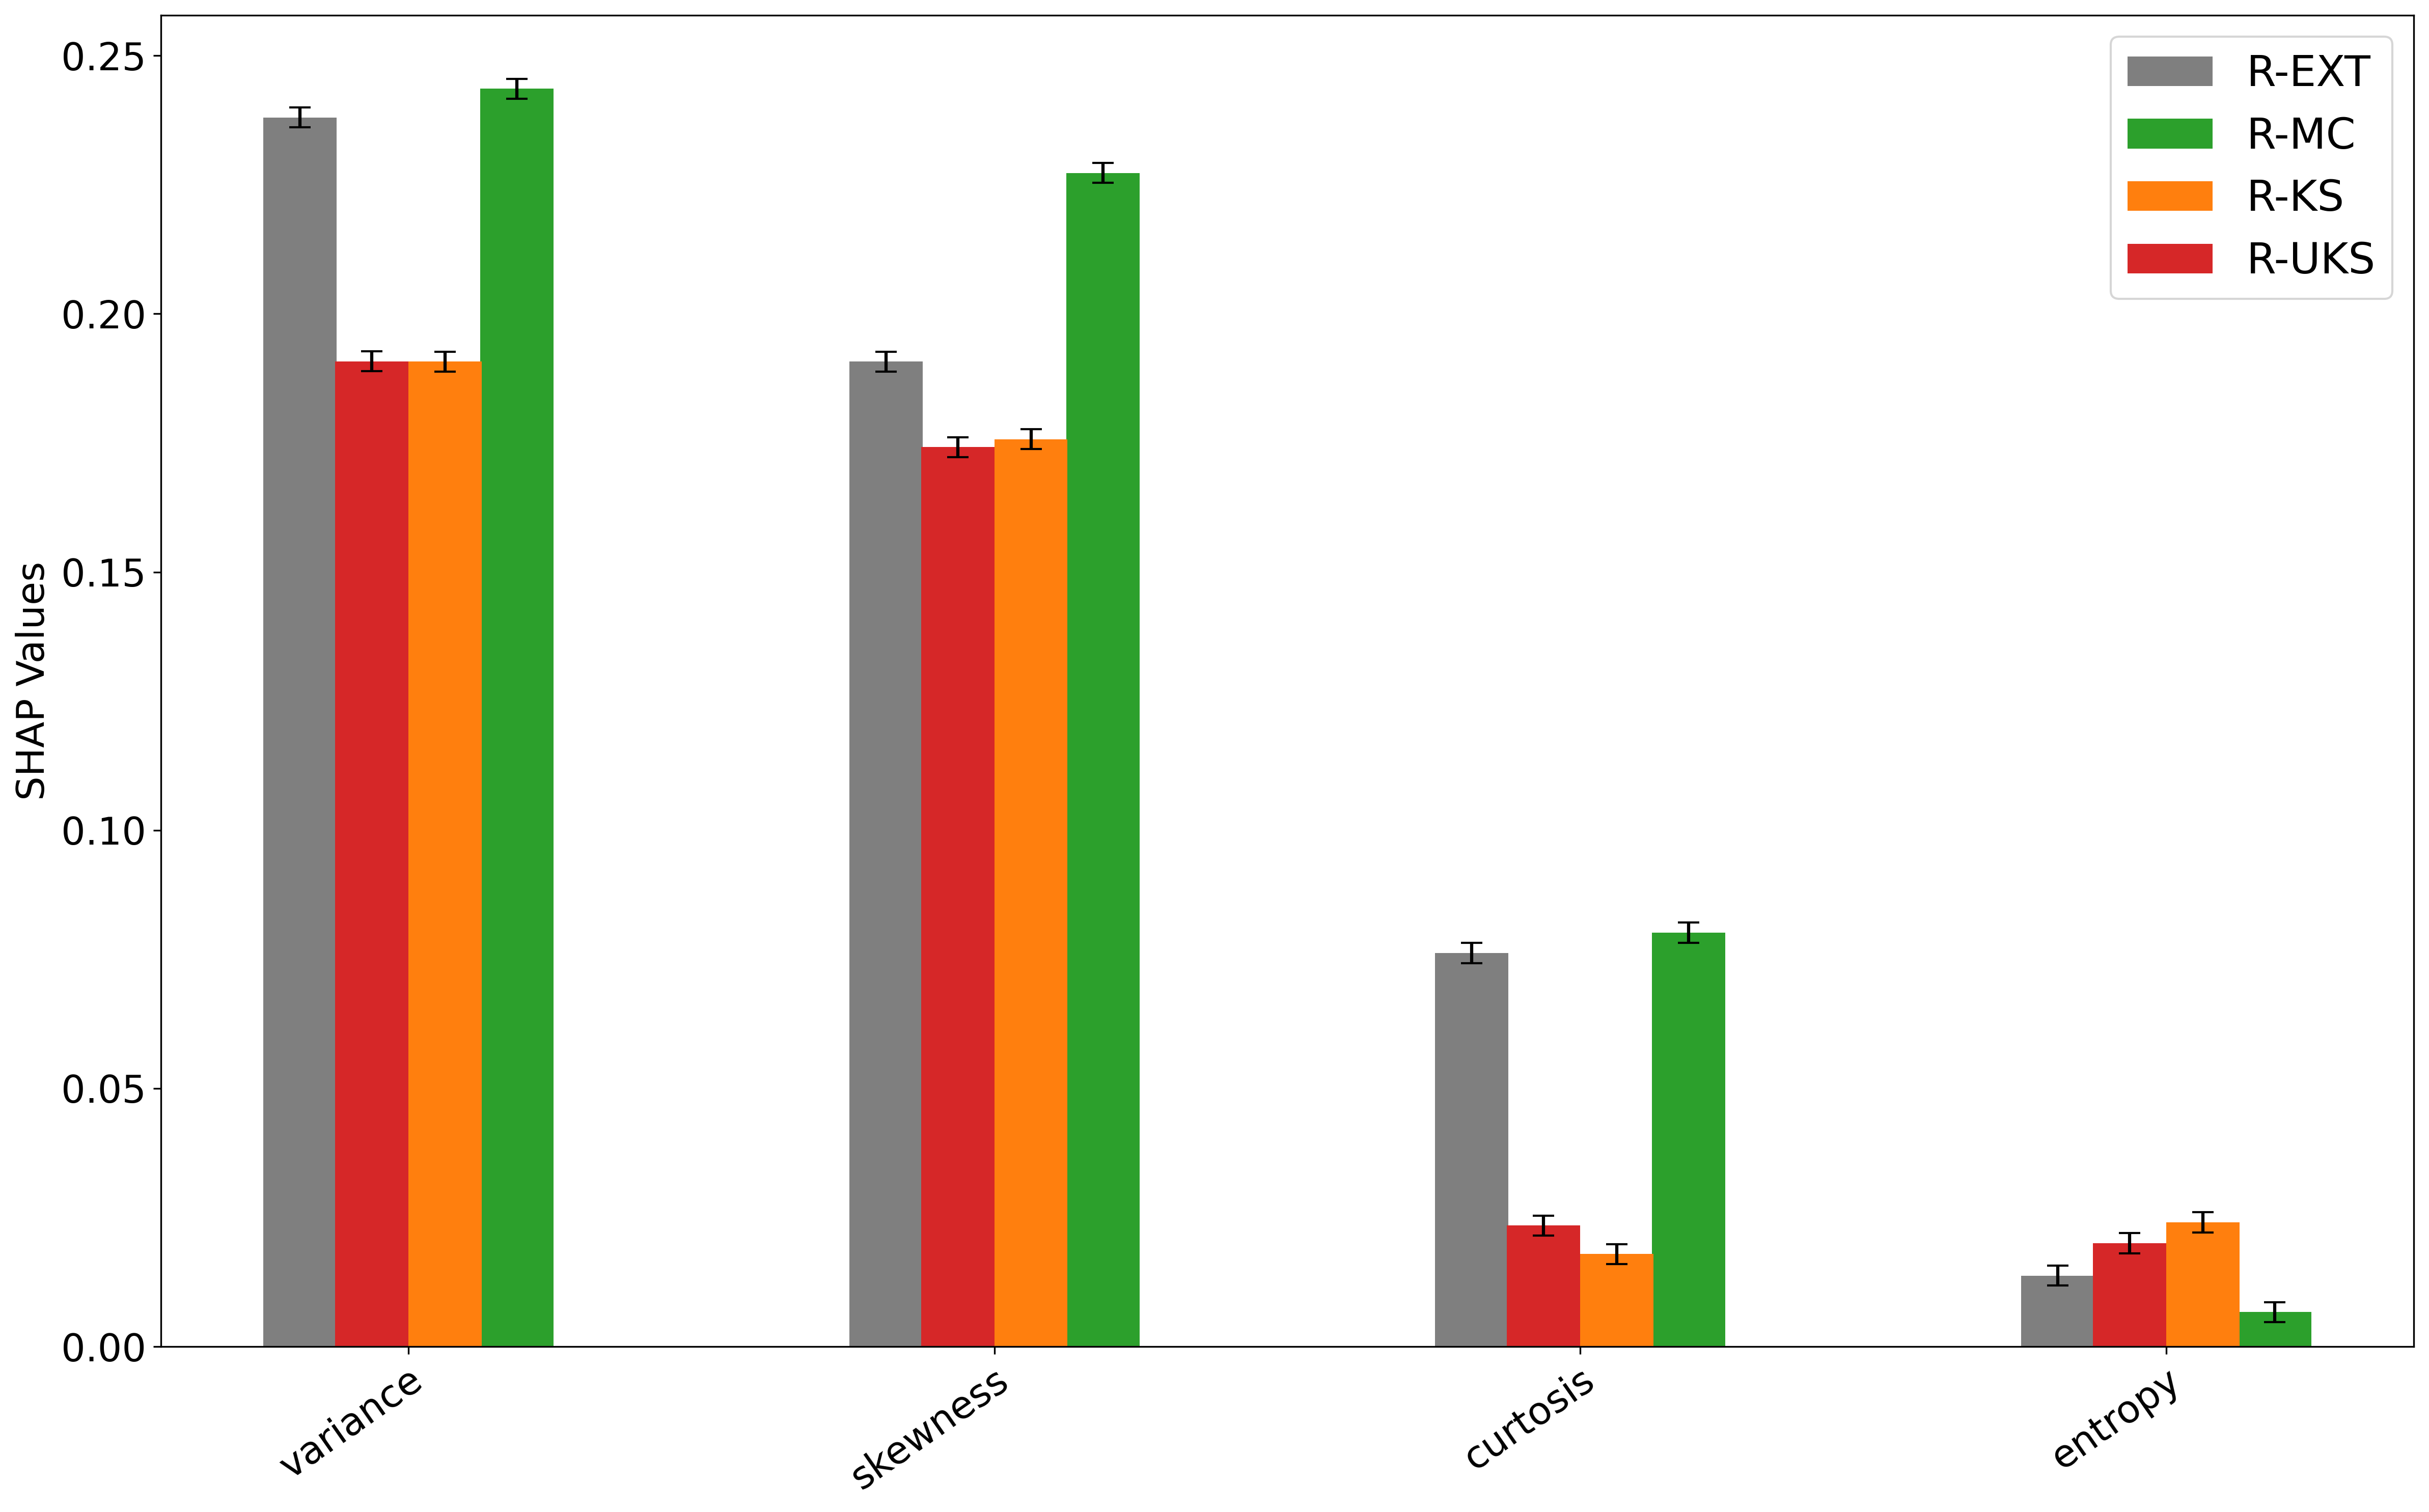

In [10]:
BarPlot(benchmark, Bank).plot(type="reformulated") 

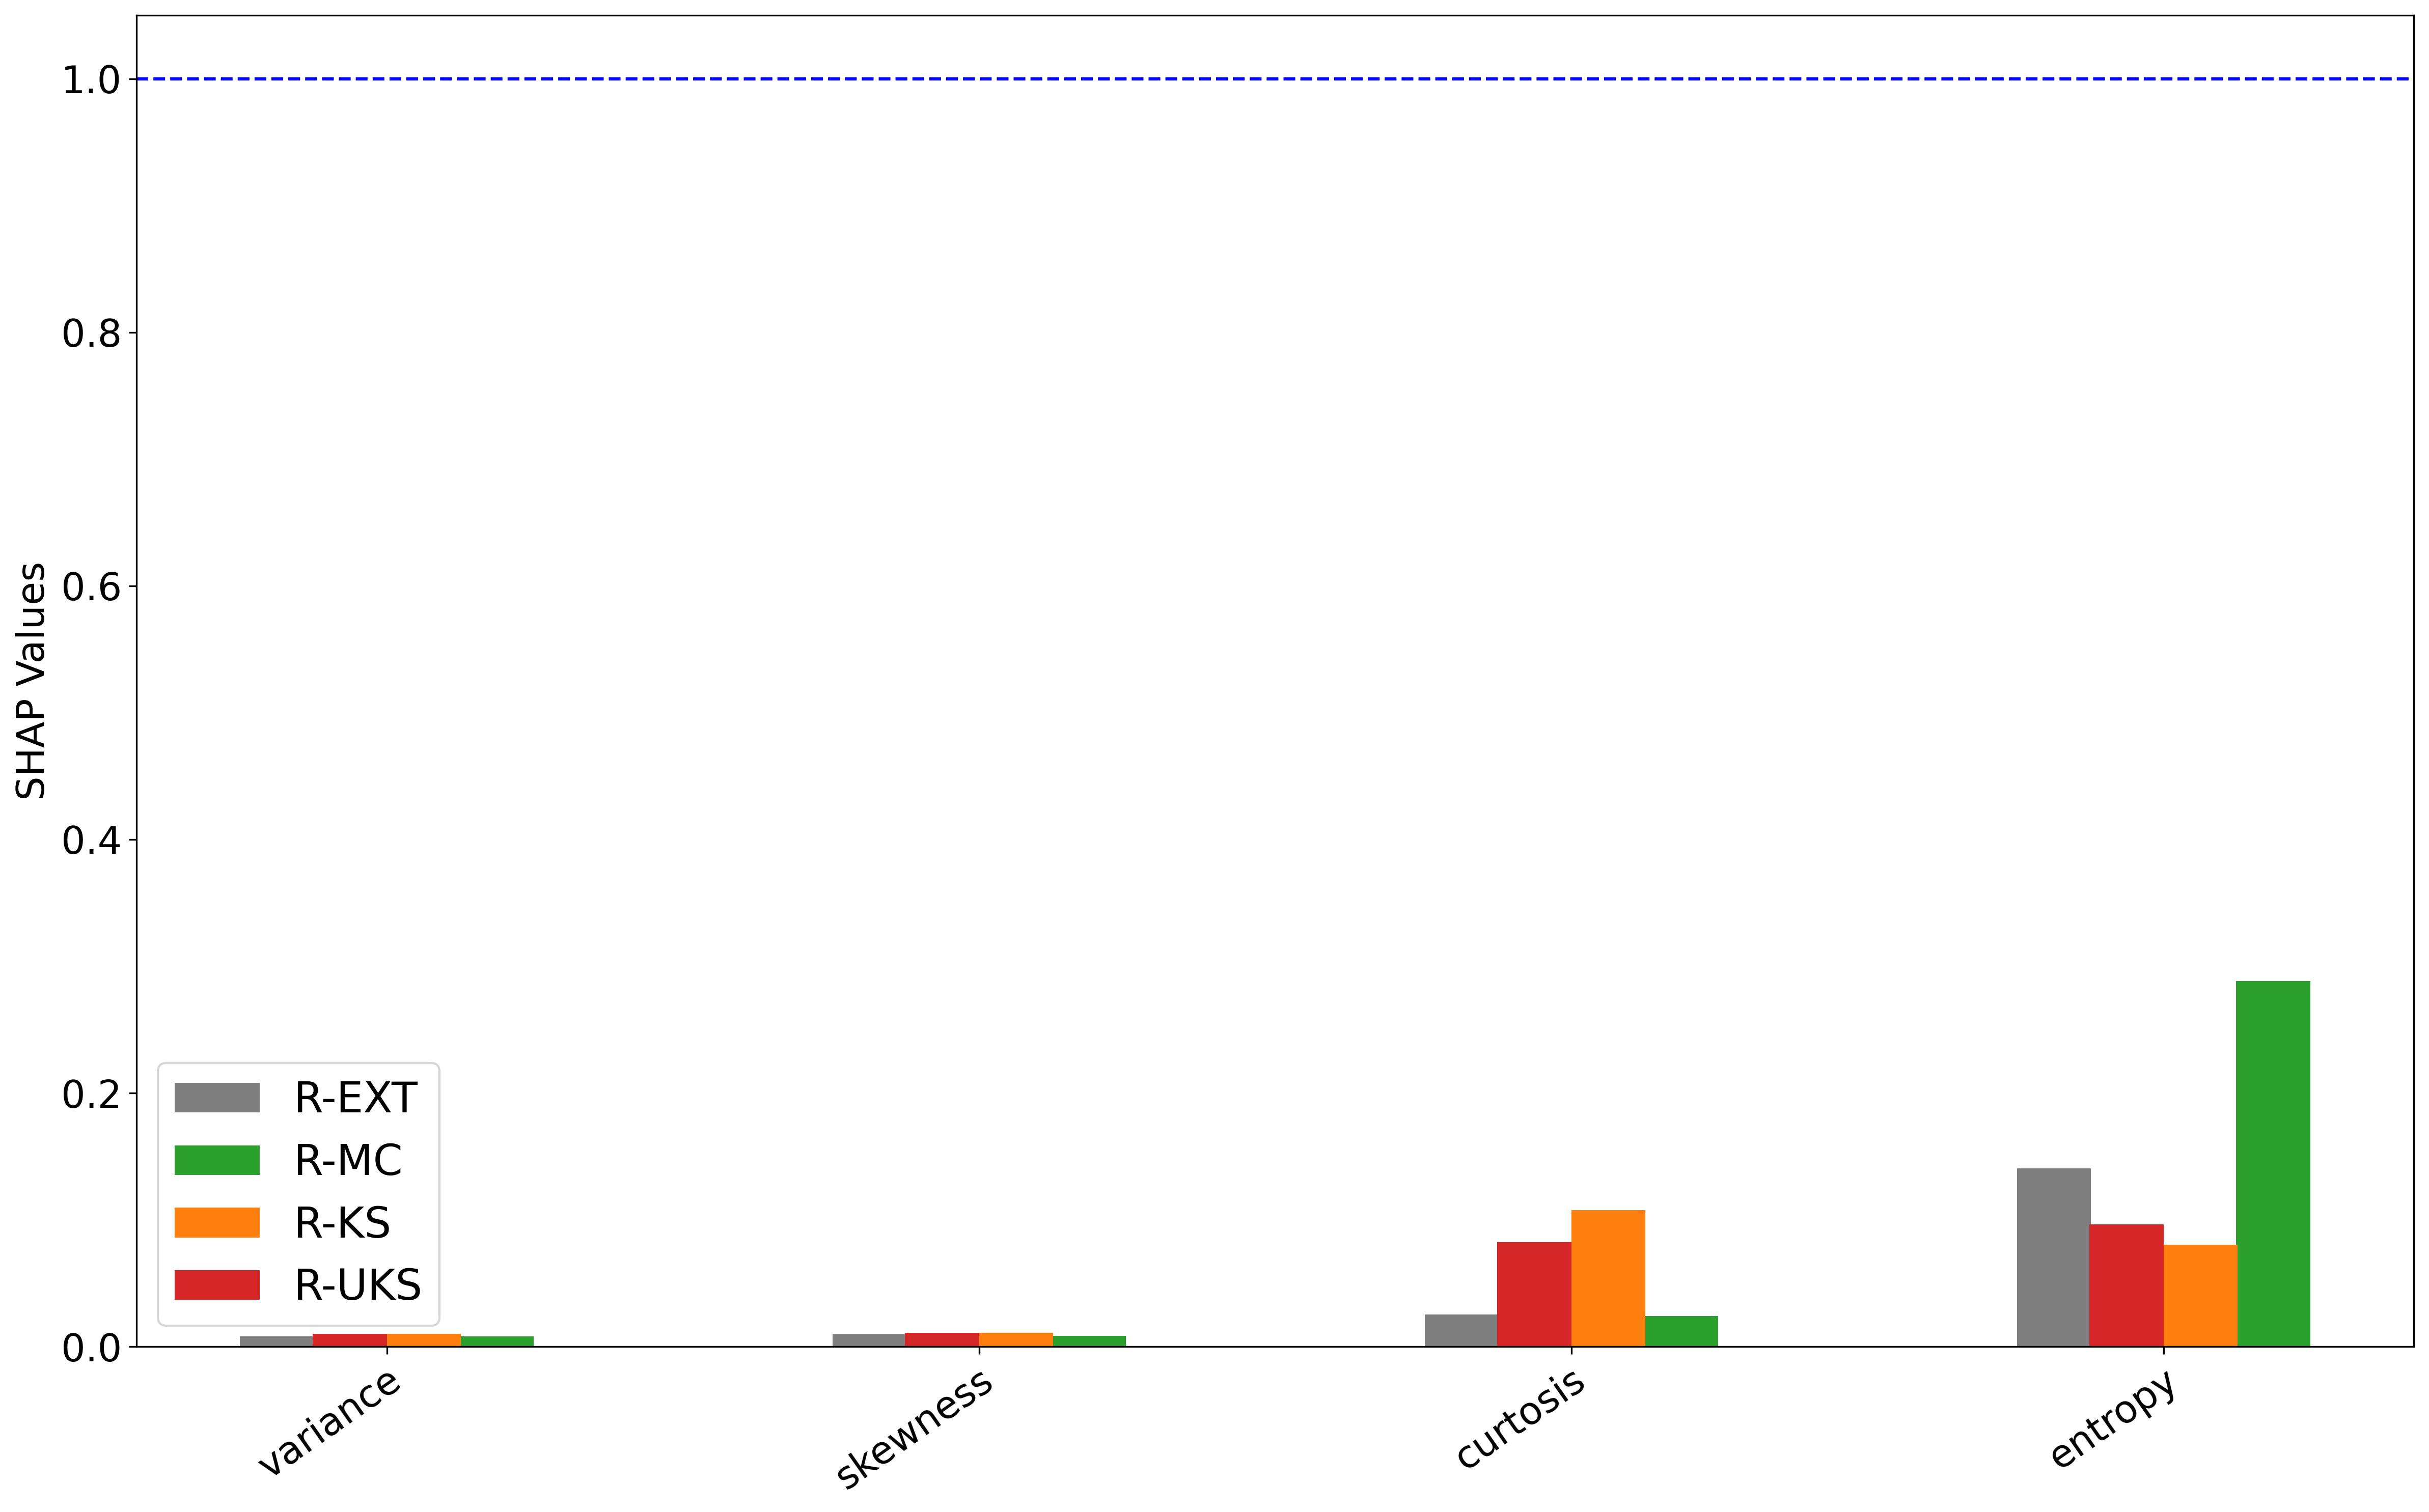

In [11]:
CoVPlot(benchmark, Bank).plot(type="reformulated") 

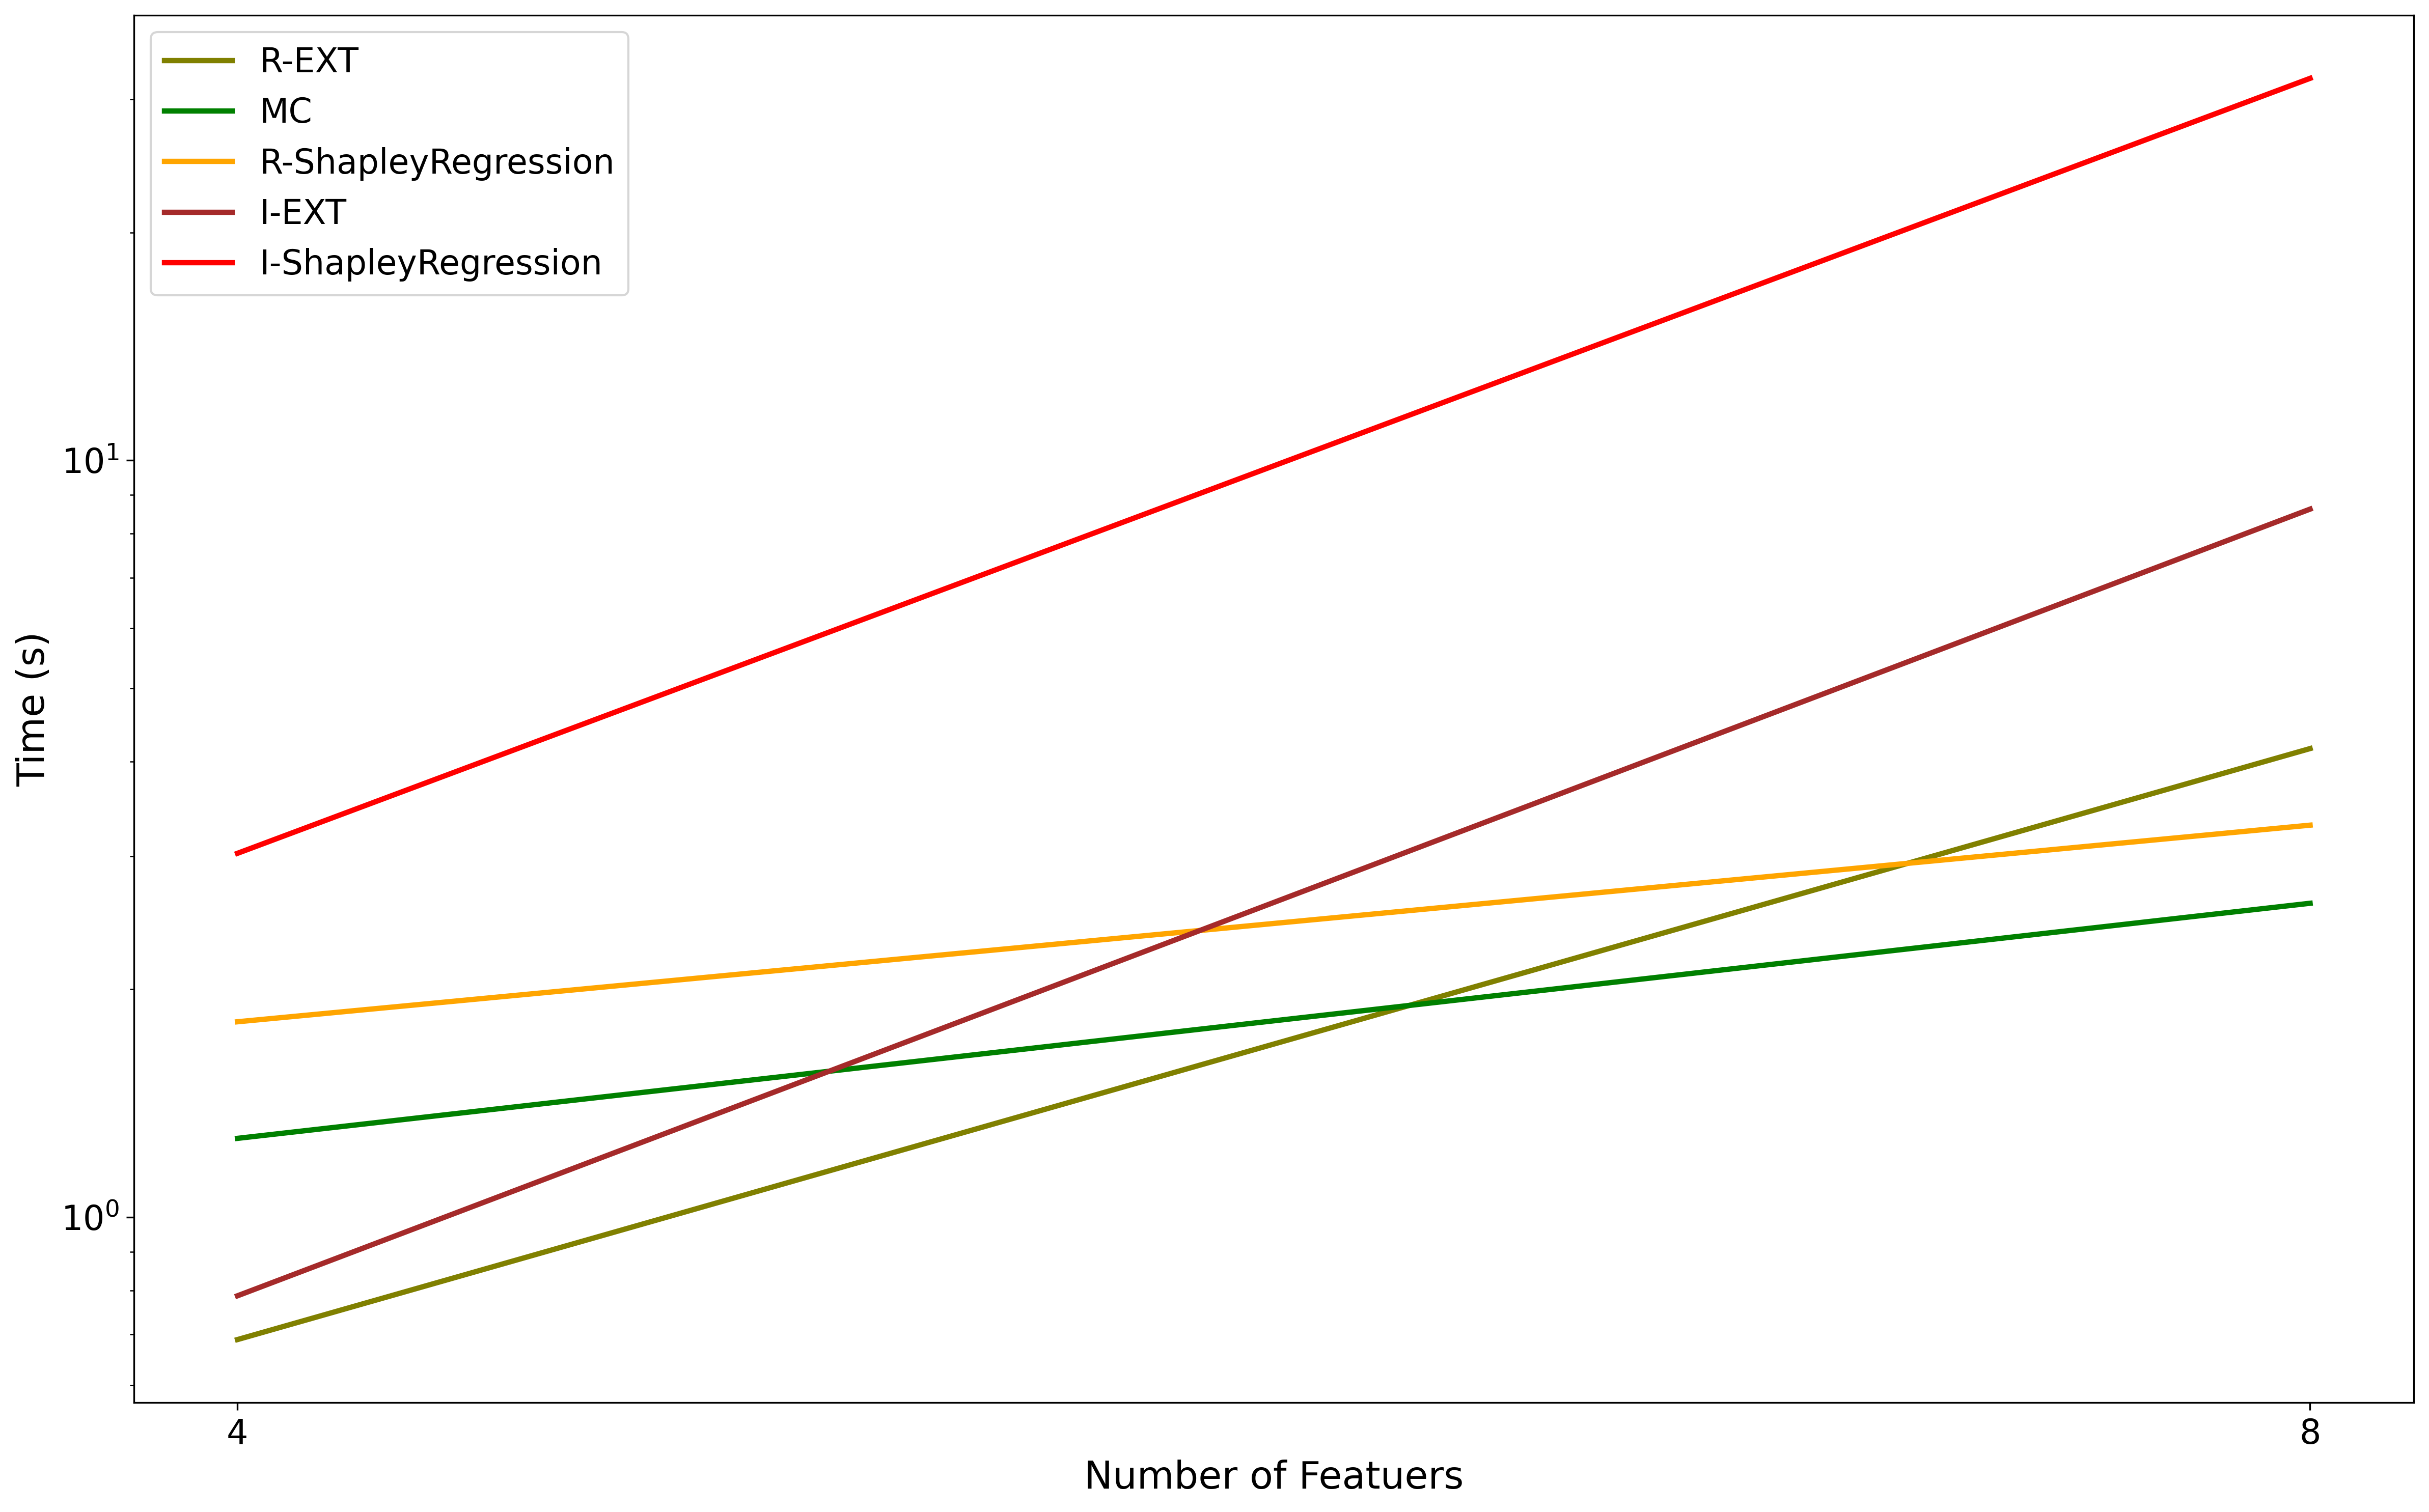

In [12]:
TimeFeaturePlot(benchmark).plot()